In [4]:
import my_dir
import pandas as pd
import numpy as np



In [7]:
train=pd.read_csv("digits_train.csv")


NameError: name 'pr' is not defined

In [ ]:
test=pd.read_csv("digits_test.csv")

In [16]:
a=train.drop("label",axis=1)
a=np.asarray(a)

In [23]:
train.shape

(42000, 785)

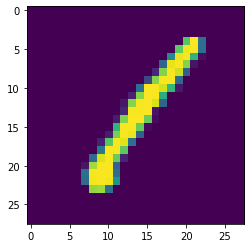

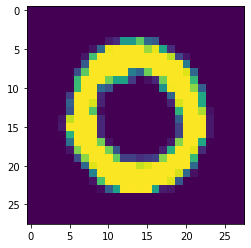

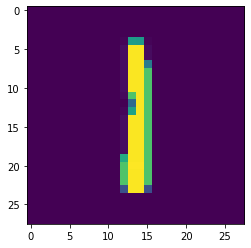

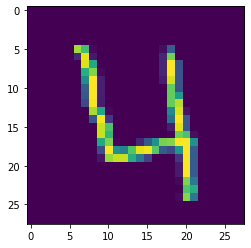

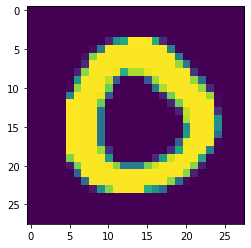

In [26]:
for i in range(0,5):
    import matplotlib.pyplot as plt
    plt.imshow(a[i].reshape(28,28))
    plt.show()

In [35]:
train.shape[0]

42000

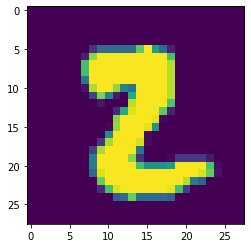

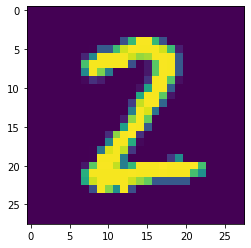

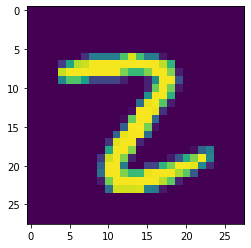

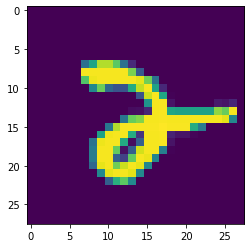

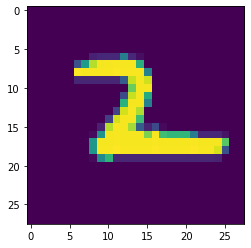

In [52]:
for i in range(5):    
    b=train[train["label"]==2]
    b=b.drop("label",axis=1)
    b=np.asarray(b)
    plt.imshow(b[i].reshape(28,28))
    plt.show()
    

In [65]:
x_train=train.drop("label",axis=1)
x_train=np.asarray(x_train)
y_train=train[["label"]]

In [66]:
x_train=x_train.reshape(42000,28,28,1)

In [67]:
x_train=x_train/255

In [92]:
x_test=test
x_test=np.asarray(x_test)
x_test=x_test/255
x_test=x_test.reshape(28000,28,28,1)

(28000, 28, 28, 1)

In [72]:
from keras.layers import Conv2D , LeakyReLU , Dense , MaxPool2D , Flatten , Dropout
from keras import Sequential


In [73]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=x_train[0].shape))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))           
model.add(Flatten()) 
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax')) 

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [80]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=["accuracy"])
model_history=model.fit(x_train,y_train,batch_size=128,epochs=5,verbose=1,validation_split=0.33)

Epoch 1/5
220/220 [==============================] - 30s 137ms/step - loss: 0.0244 - accuracy: 0.9918 - val_loss: 0.0440 - val_accuracy: 0.9890
Epoch 2/5
220/220 [==============================] - 31s 139ms/step - loss: 0.0199 - accuracy: 0.9933 - val_loss: 0.0456 - val_accuracy: 0.9887
Epoch 3/5
220/220 [==============================] - 31s 140ms/step - loss: 0.0208 - accuracy: 0.9925 - val_loss: 0.0464 - val_accuracy: 0.9890
Epoch 4/5
220/220 [==============================] - 31s 141ms/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 0.0420 - val_accuracy: 0.9900
Epoch 5/5
220/220 [==============================] - 31s 142ms/step - loss: 0.0175 - accuracy: 0.9940 - val_loss: 0.0422 - val_accuracy: 0.9895


In [117]:
y_pred=model.predict_classes(x_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(28000,)

[2 0 9 9 3]


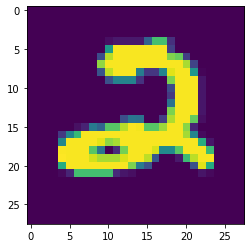

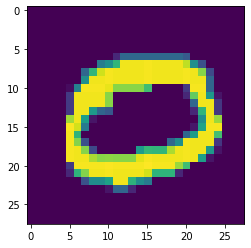

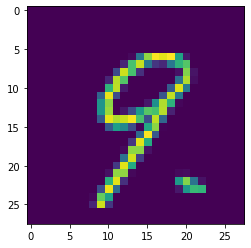

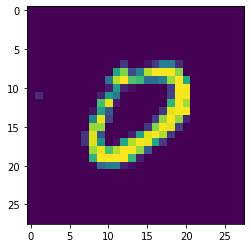

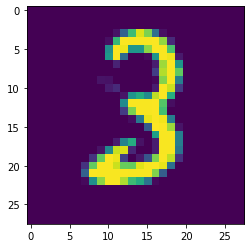

In [121]:
print(y_pred[:5])
for i in range(0,5):
    plt.imshow(x_test[i].reshape(28,28))
    plt.show()

In [122]:
model.save("Digits_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Digits_model\assets
